The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
No data for Datasets.ARXIV_CONDMAT
No data for Datasets.OGB_CITATION2
No data for Datasets.OGB_PPA
No data for Datasets.ROADNET_CA
No data for Datasets.SV_WIKIQUOTE_EDITS


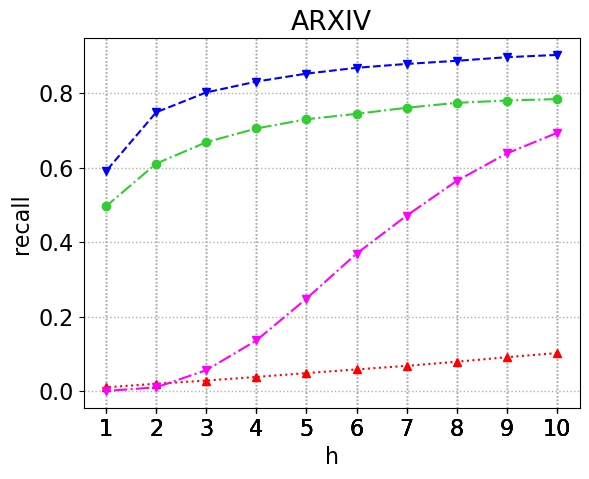

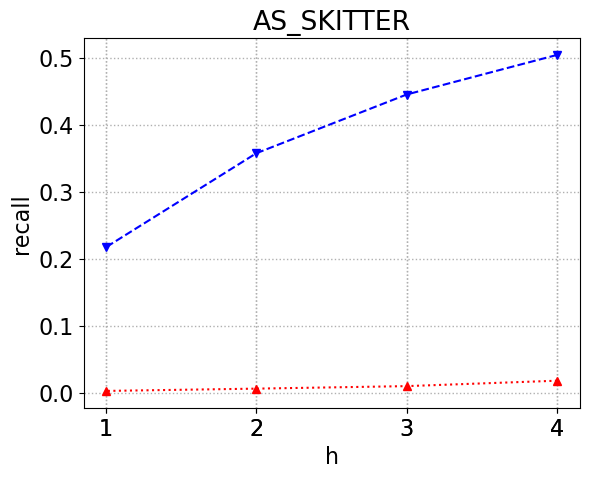

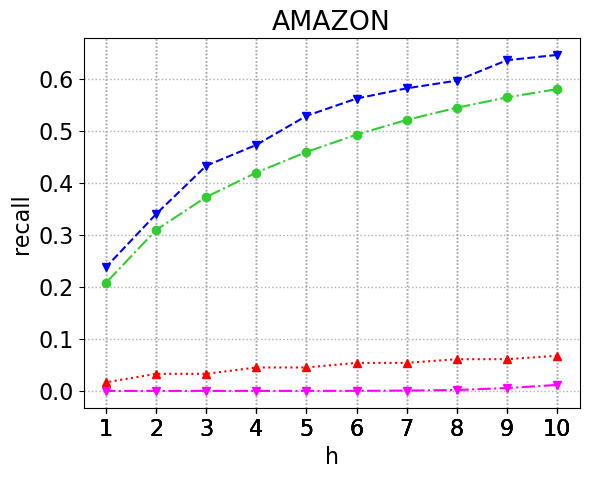

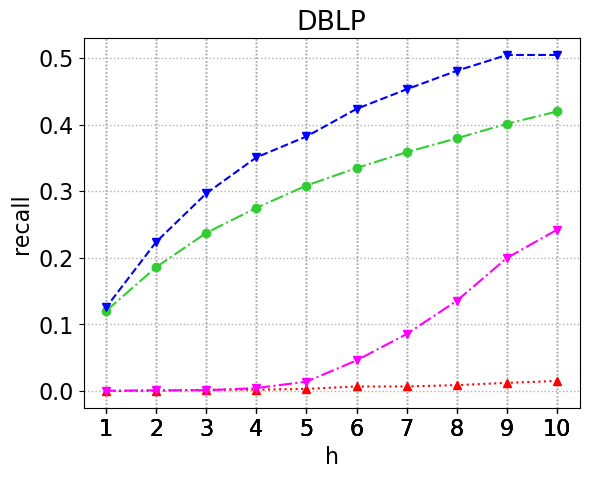

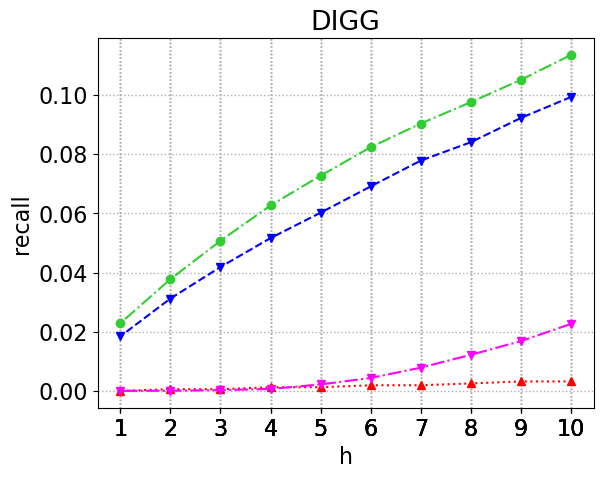

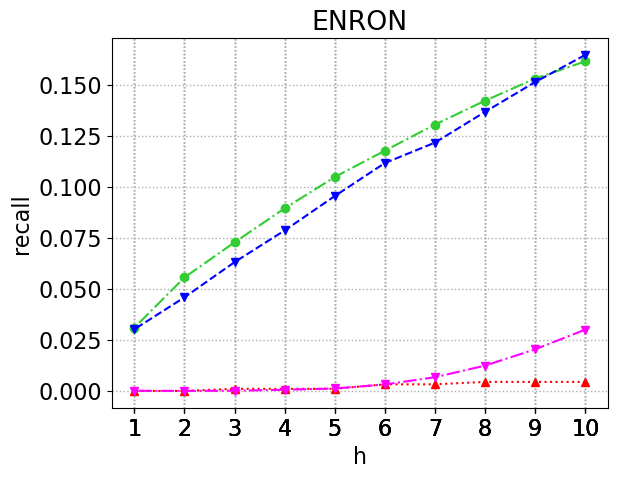

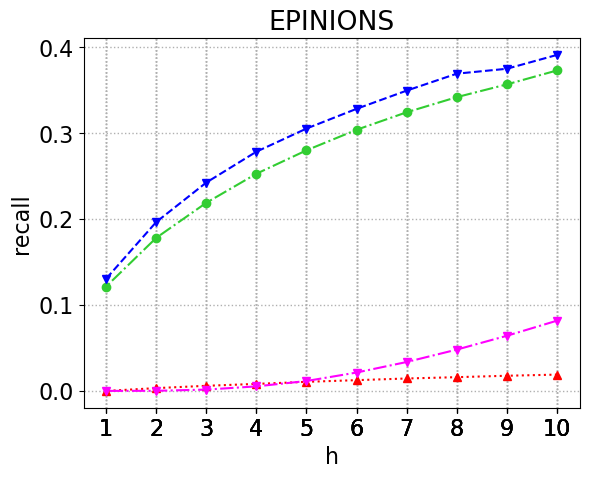

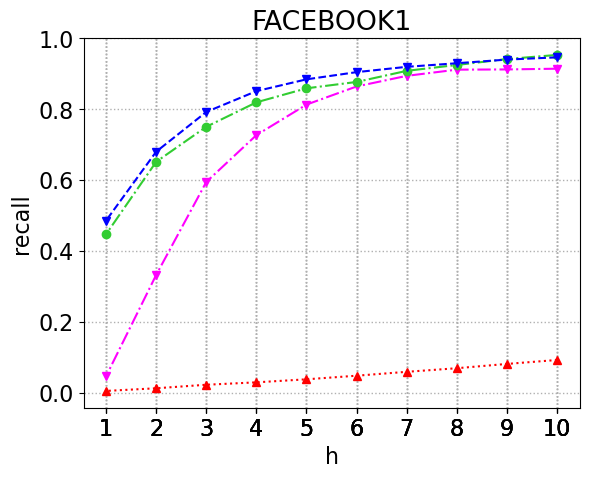

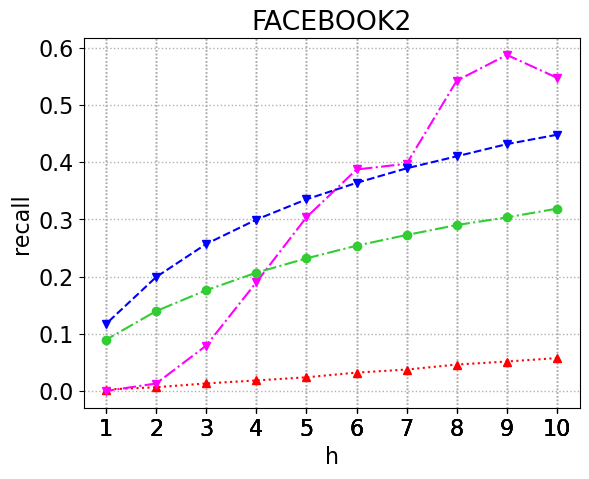

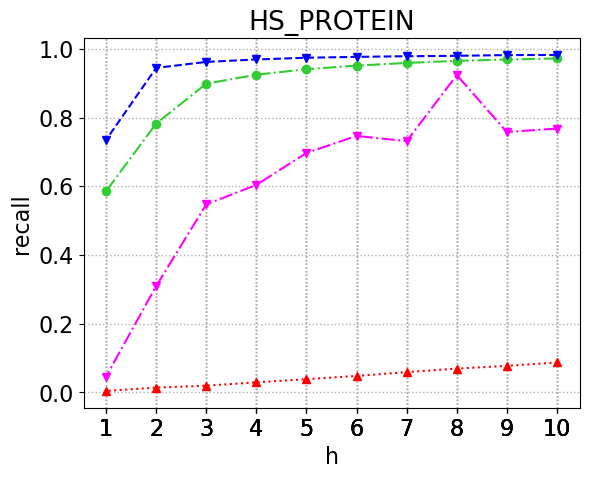

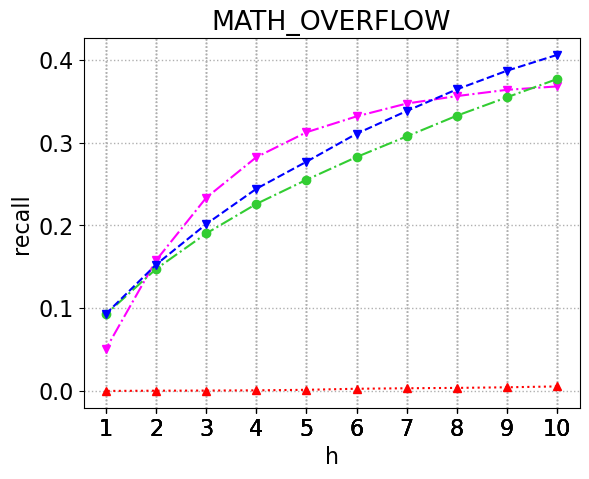

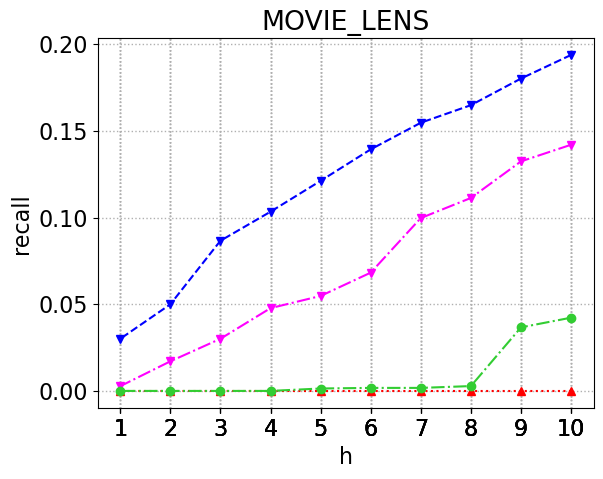

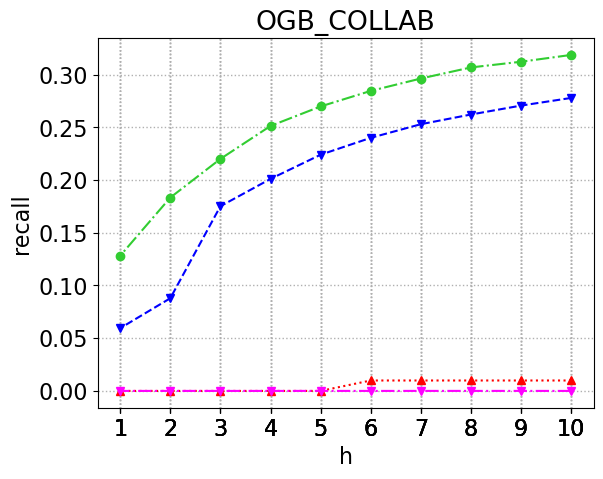

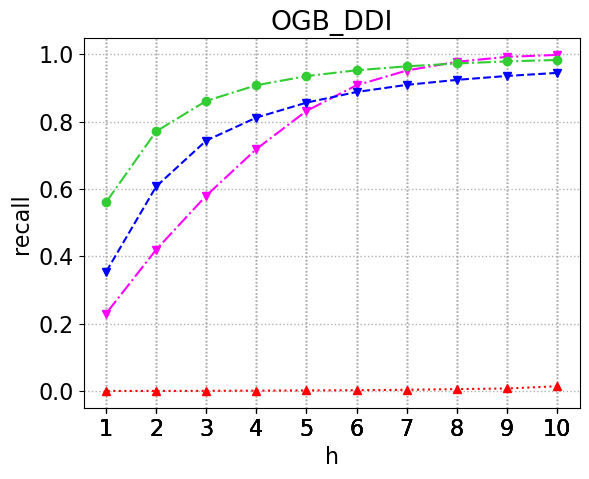

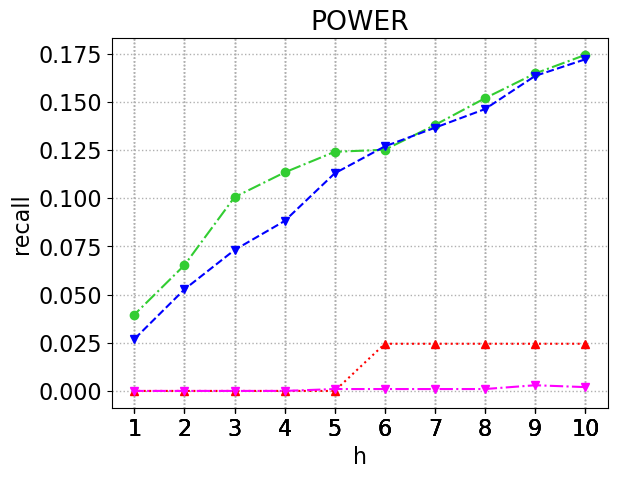

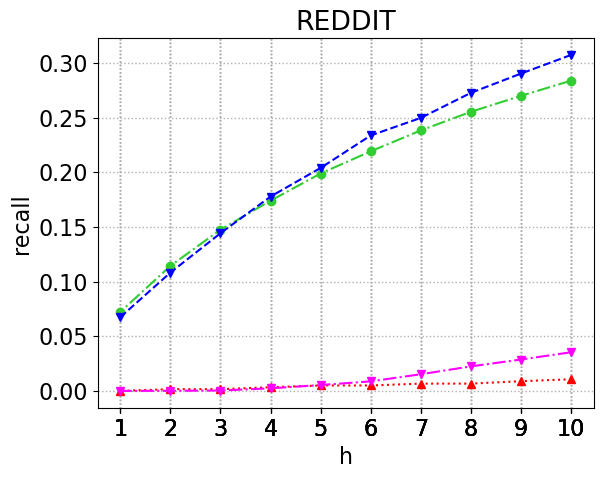

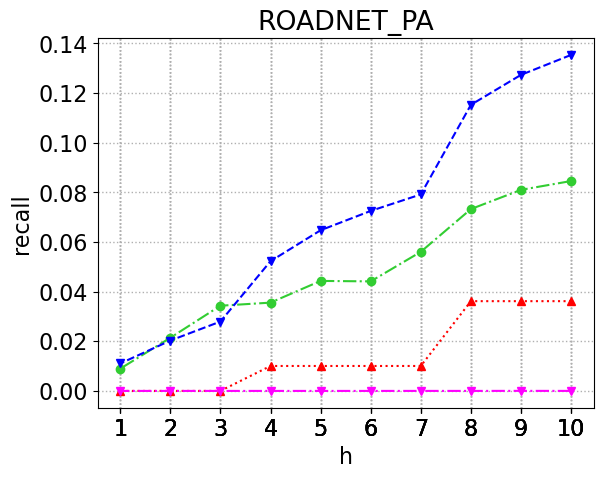

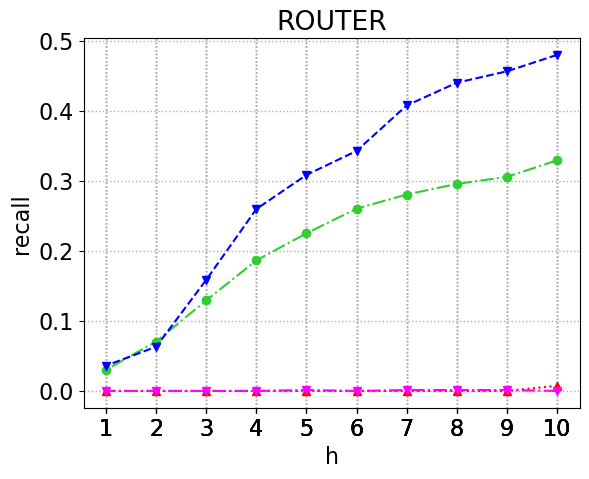

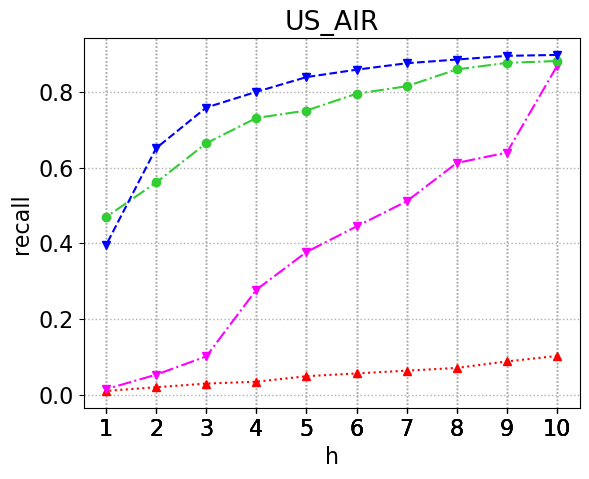

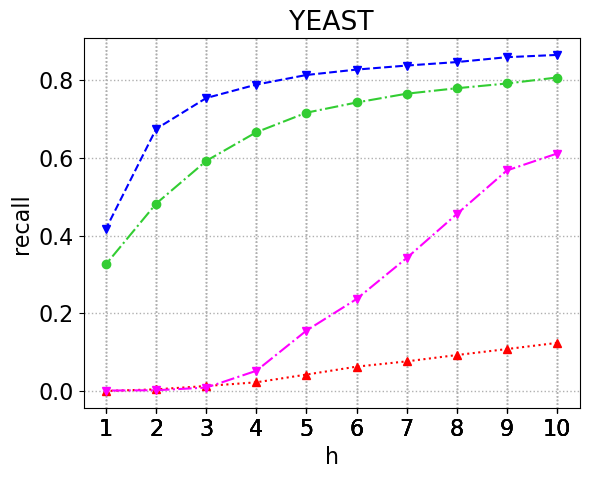

In [16]:
import sys
sys.path.append('candidate_selection')

from dataset.dataset_reader import Datasets
from candidate_selection.benchmarking.benchmark_visualizer import BenchmarkVisualizer
%load_ext autoreload
%autoreload 2


visualizer = BenchmarkVisualizer("benchmarks-final.txt")

datasets = sorted([member for member in Datasets], key=lambda x: x.value[0].lower())
# datasets = [Datasets.AMAZON, Datasets.OGB_DDI, Datasets.ROADNET_PA]
algos = None
algos = ["Bfs", "Knn", "LinkWaldo", "Dappr" ] #"RandomWalkRestartsPregel"] #

for dataset in datasets:
    try:
        figure = visualizer.plot(
            x_name="h", 
            y_name="recall", 
            dataset=dataset, 
            algorithm_names=algos,
            show_title=True,
            show_grid=True,
            log_scale=False,
            legend=False,
            font_size=16
        )
        figure.savefig(f"plots/{dataset.value[0]}_recall.png", bbox_inches='tight')

        # figure = visualizer.plot(
        #     x_name="h", 
        #     y_name="TPLP", 
        #     dataset=dataset, 
        #     algorithm_names=algos,
        #     show_title=True,
        #     show_grid=True,
        #     log_scale=False,
        #     legend=False,
        #     font_size=16
        # )
        # figure.savefig(f"plots/{dataset.value[0]}_TPLP.png", bbox_inches='tight')

    except:
        print("No data for", dataset)

In [17]:
visualizer = BenchmarkVisualizer("benchmarks-final.txt")
visualizer.print_best_results(
    algorithm_names=["Dappr", "Bfs", "LinkWaldo", "Knn", ]
)

avg_tplp defaultdict(<function BenchmarkVisualizer.print_best_results.<locals>.<lambda> at 0x7fa3a174add0>, {})
All avgs US_AIR [('Dappr', 0.79), ('Bfs', 0.05), ('LinkWaldo', 0.74), ('Knn', 0.39)]
[('Dappr', 0.7856097560975611), ('LinkWaldo', 0.7402469135802469), ('Knn', 0.38968903524344245), ('Bfs', 0.05206812652068127)]
Dappr compared to second best: 0.06
Best avg:  ('Dappr', 0.7856097560975611)
avg_tplp defaultdict(<function BenchmarkVisualizer.print_best_results.<locals>.<lambda> at 0x7fa3d8cdf520>, {})
All avgs YEAST [('Dappr', 0.77), ('Bfs', 0.05), ('LinkWaldo', 0.67), ('Knn', 0.24)]
[('Dappr', 0.7682981589582398), ('LinkWaldo', 0.6667270258035309), ('Knn', 0.24307283487116824), ('Bfs', 0.05432322317790855)]
Dappr compared to second best: 0.15
Best avg:  ('Dappr', 0.7682981589582398)
avg_tplp defaultdict(<function BenchmarkVisualizer.print_best_results.<locals>.<lambda> at 0x7fa3a174add0>, {})
All avgs MOVIE_LENS [('Dappr', 0.12), ('Bfs', 0.0), ('LinkWaldo', 0.01), ('Knn', 0.07)]

In [12]:
from candidate_selection.benchmarking.benchmark_migration import BenchmarkMigration
from dataset.dataset_reader import DatasetReader

datasets = [
            Datasets.US_AIR,
            Datasets.YEAST,
            Datasets.MOVIE_LENS,
            Datasets.FACEBOOK1,
            Datasets.OGB_DDI,
            Datasets.POWER,
            Datasets.ROUTER,
            Datasets.HS_PROTEIN,
            Datasets.DBLP,
            Datasets.ARXIV,
            Datasets.MATH_OVERFLOW,
            Datasets.FACEBOOK2,
            Datasets.REDDIT,
            Datasets.EPINIONS,
            Datasets.ENRON,
            Datasets.OGB_COLLAB,
            Datasets.DIGG,
            Datasets.AMAZON,
            Datasets.ROADNET_PA,
        ]
# for dataset in datasets:
    # print("Migrating dataset", dataset)
    # (
    #     G,
    #     G_test,
    #     positive_train_edges,
    #     negative_train_edges,
    #     positive_validation_edges,
    #     negative_validation_edges,
    #     positive_test_edges,
    #     is_bipartite) = DatasetReader().read_and_split(dataset, 0.2, 0.1, 0.2)

migration = BenchmarkMigration("benchmarks-final.txt", "benchmarks-final2.txt", None, None)
# def func(benchmark):
#     benchmark["statistics"]["tplp"] = 1/benchmark["statistics"]["scans_per_found_edge"] if benchmark["statistics"]["scans_per_found_edge"] > 0 else 0
#     return benchmark
# migration.run_func_on_row(func)
migration.write_to_file()


In [18]:
import sys
sys.path.append('candidate_selection')

from dataset.dataset_reader import Datasets
from candidate_selection.benchmarking.benchmark_visualizer import BenchmarkVisualizer
%load_ext autoreload
%autoreload 2

visualizer = BenchmarkVisualizer("benchmarks-final.txt")
visualizer.print_time_table(
    algorithm_names=["Dappr", "Bfs", "LinkWaldo", "Knn", ],
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
US\_AIR & 0.4 & 1.1 & 0.0 & 0.0 & 1.5 & 1.1 & 0.5 & 1.2  \\
\hline
YEAST & 3.8 & 7.8 & 0.0 & 0.0 & 17.4 & 7.0 & 0.6 & 7.1  \\
\hline
MOVIE\_LENS & 2.0 & 13.7 & 0.0 & 0.1 & 13.7 & 17.9 & 7.1 & 42.2  \\
\hline
FACEBOOK1 & 12.6 & 20.7 & 0.1 & 0.4 & 54.8 & 48.2 & 10.4 & 62.7  \\
\hline
OGB\_DDI & 123.4 & 324.5 & 0.8 & 8.8 & 507.8 & 764.3 & 188.8 & 3360.9  \\
\hline
POWER & 11.7 & 8.9 & 0.0 & 0.0 & 22.4 & 10.0 & 0.6 & 6.4  \\
\hline
ROUTER & 15.2 & 15.9 & 0.0 & 0.0 & 25.4 & 9.3 & 0.8 & 5.5  \\
\hline
HS\_PROTEIN & 19.6 & 43.0 & 0.1 & 0.5 & 90.4 & 37.2 & 21.7 & 126.0  \\
\hline
DBLP & 11.8 & 19.1 & 0.1 & 0.2 & 45.5 & 47.1 & 11.2 & 45.9  \\
\hline
ARXIV & 26.0 & 70.5 & 0.2 & 0.7 & 88.8 & 105.3 & 58.8 & 189.5  \\
\hline
MATH\_OVERFLOW & 18.0 & 50.1 & 1.3 & 1.1 & 60.1 & 61.2 & 87.2 & 1027.1  \\
\hline
FACEBOOK2 & 47.5 & 266.4 & 1.7 & 5.8 & 746.0 & 710.3 & 401.2 & 1001.9  \\
\hline
REDDIT & 28.8 & 135.2 & 1.2